<a href="https://colab.research.google.com/github/masaki0710/sample/blob/main/mathbullet_pythonML_master_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonの基礎知識



## 四則演算

## 代入

## 条件分岐（if）

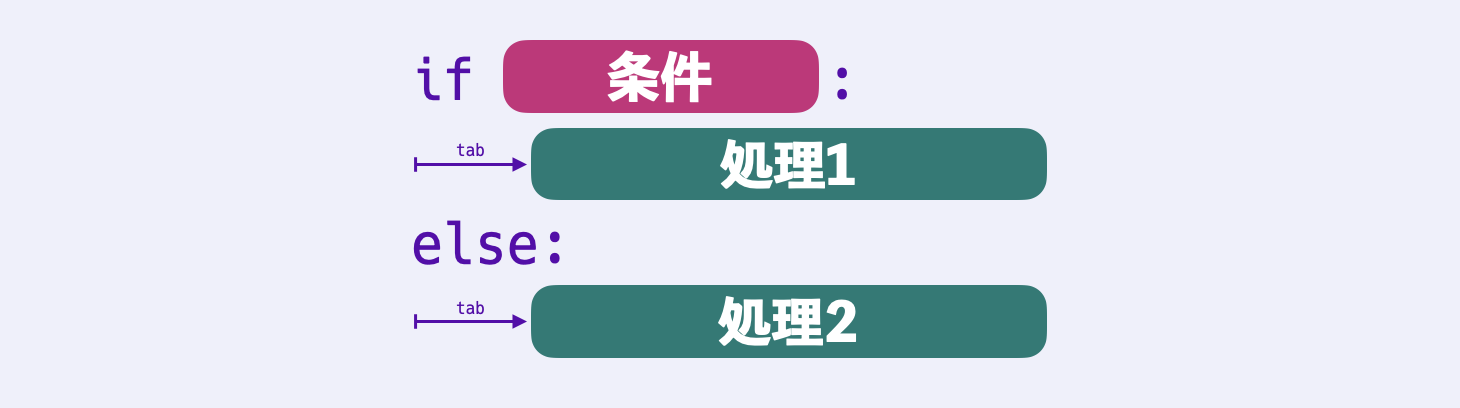

## ループ処理（for）

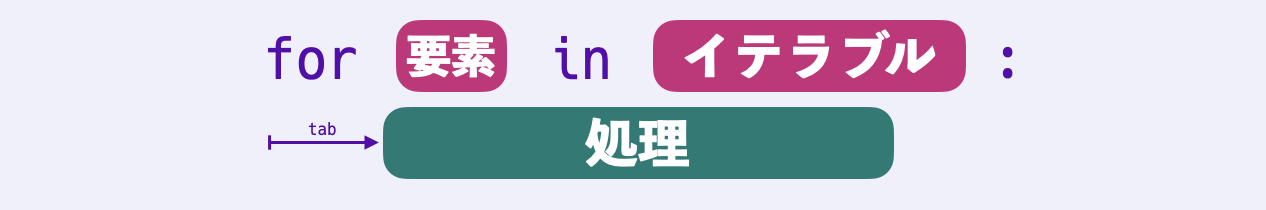

In [ ]:
# X の各要素に2を掛けて表示

X = [1, 2, 3, 4, 5] # リスト



## 関数（def）

```
square_sum(2, 3) # 第1引数の2乗と第2引数の2乗の和を返す関数
```

```
13
```


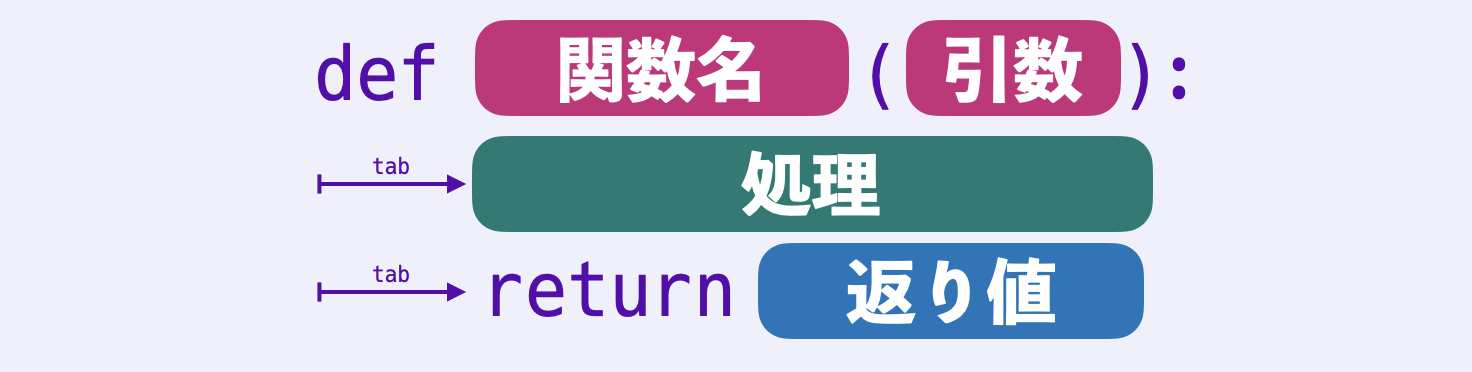

In [ ]:
def square_sum(x, y):


In [ ]:
square_sum(2, 3)

In [ ]:
def sum_elements(lst): # lst の要素を全部足して、出力する


In [ ]:
sum_elements([1, 2, 3])

## クラス（class）

$a,b,c$ を与えられて、以下の二次関数をシミュレートするクラスを定義する：

$$
y = a(x+b)^2 + c
$$

# 機械学習の実践

## 擬似データの生成

$$
y = 2x_{0} + 3\sin (3x_{1}) + 2
$$

In [ ]:
import numpy as np
import pandas as pd # polars

np.random.seed(0)
x_0 = np.random.normal(0, 1, 500)
x_1 = np.random.normal(0, 1, 500)
y = 2 * x_0 + 3 * np.sin(3*x_1) + 2

# データフレーム
data = pd.DataFrame({'x_0': x_0, 'x_1': x_1, 'y': y})

In [ ]:
data

## データの分割

学習データ:テストデータ = 8:2 になるように分割を行う。

In [ ]:
from sklearn.model_selection import train_test_split

# データ分割
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [ ]:
train

In [ ]:
test

## 学習データの可視化

In [ ]:
import plotly.express as px

# x_0を横軸に、yを縦軸にしたプロット
fig1 = px.scatter(train, x='x_0', y='y', title='y = 3x_0 + sin(3x_1) + 2 with x_0')
fig1.show()

# x_1を横軸に、yを縦軸にしたプロット
fig2 = px.scatter(train, x='x_1', y='y', title='y = 3x_0 + sin(3x_1) + 2 with x_1')
fig2.show()


## 学習・評価

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## 線形回帰モデルの可視化

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=test['x_0'], y=test['x_1'], z=test['y'], mode='markers', marker=dict(size=2), name='Test Data'))

x_plane, y_plane = np.meshgrid(np.linspace(test['x_0'].min(), test['x_0'].max(), 10),
                               np.linspace(test['x_1'].min(), test['x_1'].max(), 10))
z_plane = linear_model.intercept_ + linear_model.coef_[0] * x_plane + linear_model.coef_[1] * y_plane

fig.add_trace(go.Surface(x=x_plane, y=y_plane, z=z_plane, name='Regression Plane', opacity=0.5, showscale=False))

fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=10, range=[-3, 3]),
        yaxis=dict(nticks=10, range=[-3, 3]),
        zaxis=dict(nticks=10, range=[-3, 3]),
        xaxis_title='x_0',
        yaxis_title='x_1',
        zaxis_title='y'
    ),
    scene_aspectmode='cube',
    width=700,
    height=700
)

fig.show()


## 決定木回帰モデルの可視化

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=['x_0', 'x_1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph